In [2]:
import matplotlib.pyplot as plt

In [3]:
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [4]:
image = plt.imread('Happymathias.jpg')

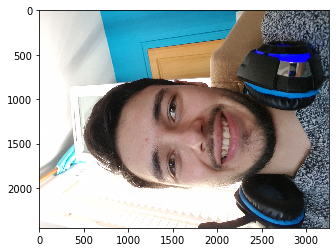

In [5]:
 plt.imshow(image)

In [6]:
image.shape

(2448, 3264, 3)

In [7]:
detecteur = MTCNN ()

In [8]:
faces = detecteur.detect_faces(image)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_891]

Function call stack:
keras_scratch_graph


In [ ]:
#print(faces)

In [ ]:
for face in faces:
    print(face['box'])

In [9]:
from matplotlib.patches import Rectangle

In [50]:
def detourage_faces (chemin_image, faces):
    image = plt.imread(chemin_image)
    plt.imshow (image)
    ax = plt.gca()
    for face in faces:
        x1,y1,height,width = face['box']
    
    face_border = Rectangle((x1,y1),height,width, fill = False, color = 'red')
    ax.add_patch(face_border)
    plt.show()

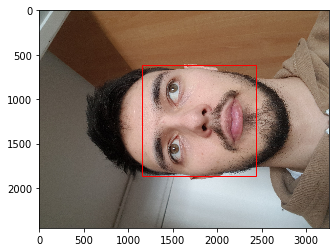

In [51]:
image = plt.imread('Mathias1.jpg')
faces = detecteur.detect_faces(image)

detourage_faces('Mathias1.jpg',faces)

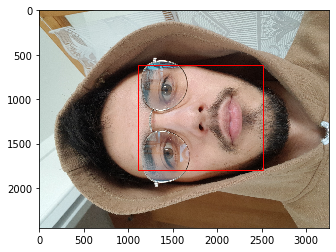

In [52]:
image = plt.imread('Mathias2.jpg')
faces = detecteur.detect_faces(image)

detourage_faces('Mathias2.jpg',faces)

In [53]:
from numpy import asarray
from PIL import Image

In [54]:
import sys

In [55]:
def coupage_faces (image1, image2):
    image = plt.imread(image1)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    for face in faces:
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        face_boundary = image[y1:y2, x1:x2]
        plt.imshow(face_boundary)
        plt.savefig('recadrage1.jpg')
        
    image = plt.imread(image2)
    faces = detector.detect_faces(image)
    for face in faces:
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        face_boundary = image[y1:y2, x1:x2]
        plt.imshow(face_boundary)
        plt.savefig('recadrage2.jpg')


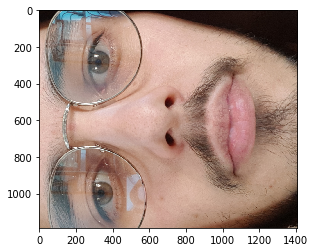

In [56]:
coupage_faces('Mathias1.jpg','Mathias2.jpg' )

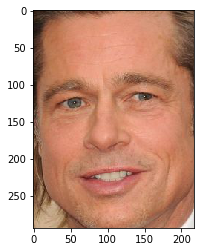

In [57]:
    image = plt.imread('Bradpitt.jpg')
    detector = MTCNN()
    faces = detector.detect_faces(image)

    for face in faces:
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        face_boundary3 = image[y1:y2, x1:x2]
        plt.imshow(face_boundary3)
        plt.savefig('recadrage3.jpg')

In [58]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [59]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      pooling='avg')

    # perform prediction
    return model.predict(samples)



In [60]:
 #On compare les 2 photos de moi 

In [61]:
image1 = plt.imread('recadrage1.jpg')
image2 = plt.imread('recadrage2.jpg')

faces = [image1, image2]

model_scores = get_model_scores(faces)
print (model_scores)


[[1.8960641e-01 3.8218591e-01 1.2906134e-01 ... 0.0000000e+00
  1.7585182e+00 2.0710342e+00]
 [3.9815813e-01 8.4840471e-01 6.9351830e-05 ... 0.0000000e+00
  5.2518427e-01 4.6723062e-01]]


In [62]:
if cosine(model_scores[0], model_scores[1]) <= 0.4:
    print("Visage reconnu")
else:
    print("veuillez scanner a nouveau votre visage")

Visage reconnu


In [63]:
image1 = plt.imread('recadrage1.jpg')
image2 = plt.imread('recadrage3.jpg')

faces = [image1, image2]
model_scores = get_model_scores(faces)
print (model_scores)

[[0.18960641 0.3821859  0.12906134 ... 0.         1.7585182  2.0710342 ]
 [0.85406065 0.14938101 1.3980365  ... 0.         0.11670762 0.01317768]]


In [64]:
if cosine(model_scores[0], model_scores[1]) <= 0.4:
    print("Visage reconnu")
else:
    print("veuillez scanner a nouveau votre visage")

veuillez scanner a nouveau votre visage
